# Tarea semanal 6

In [2]:
import numpy as np
from pytc2.sistemas_lineales import TransferFunction, pzmap, bodePlot
import matplotlib.pyplot as plt
import scipy.signal as sig
import sympy as sp
from IPython.display import display, Math

## Transferencia prototipo pasabajos normalizada

Dado que el cero de transmisión está compuesto en realidad por dos ceros en $j\omega = \pm j3$, al menos dos polos son necesarios para compensar la pendiente de la transferencia en frecuencias altas (la frecuencia de los polos es $\omega_0 = 1$).

Para lograr pendiente negativa, se debe agregar al menos un polo más.

Combinando dos polos con un denominador Butterworth de orden 3, se logra la siguiente transferencia:

$T(S)=\large\frac{S^2+9}{\left(S+1\right)\left(S+2\cos\left(\frac{\pi}{3}\right)+1\right)}$

Esta transferencia no tiene ganancia unitaria para $S = 0$. Por esto, se debe multiplicar por una constante $k = 1/9$.

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

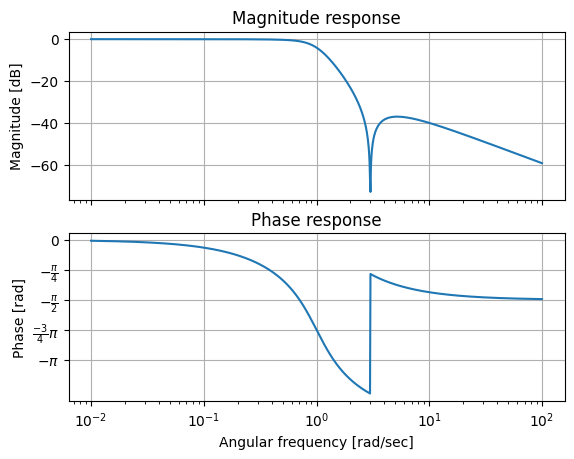

In [5]:
num = [1/9,0,1]
den = np.polymul([1,1],[1,2*np.cos(np.pi/3),1])

T_lp = TransferFunction(num,den)

bodePlot(T_lp)

La transferencia obtenida tiene la misma respuesta en frecuencia que la propuesta.

In [3]:
s,S = sp.symbols("s,S")

## Transferencia Pasaaltos normalizada

Para convertir la transferencia en pasaaltos, se debe aplicar el núcleo de transformación $S = 1/s$

In [4]:
num = sp.Poly(num, S)
den = sp.Poly(den, S)
T_lp = num/den

display(Math(r'\text{Transferencia pasabajos: } T(S)=' + sp.latex(T_lp)))

<IPython.core.display.Math object>

In [5]:
T_hp = sp.simplify(T_lp.subs(S,1/s))

display(Math(r'\text{Transferencia pasaaltos transformada: } T(s)=' + sp.latex(T_hp)))

<IPython.core.display.Math object>

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

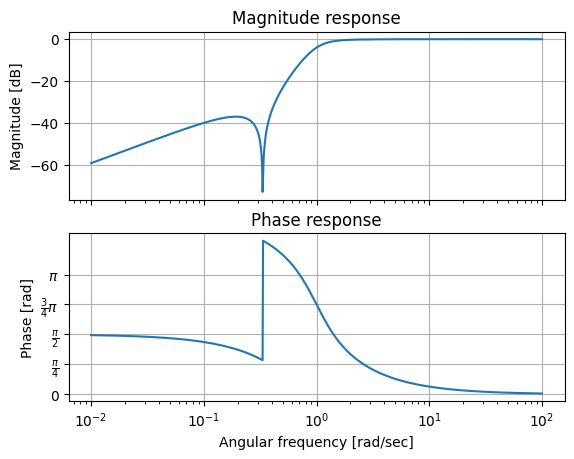

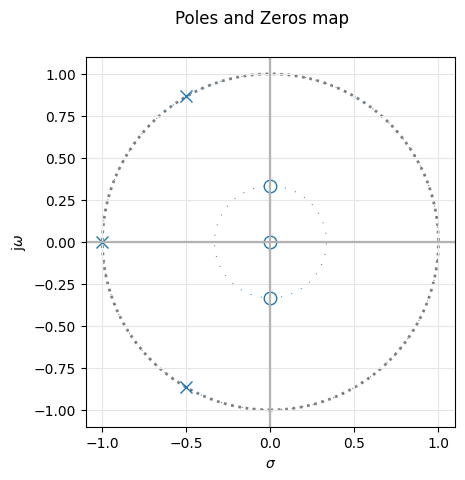

In [6]:
num,den = sp.fraction(T_hp)
num = np.array(sp.Poly(num,s).all_coeffs(),dtype=float)
den = np.array(sp.Poly(den,s).all_coeffs(),dtype=float)

T_hp = TransferFunction(num,den)

bodePlot(T_hp)
pzmap(T_hp)

El diagrama de polos y ceros conserva los polos en su ubicación original (dado que $\omega_0$ se mantiene unitaria), y los dos ceros originales se reubican en $\omega=1/3$ (inversa de su frecuencia original). Además de esto, se agrega un cero en el origen.

Se puede observar en el diagrama de bode que el cero impone una pendiente positiva para bajas frecuencias, y en altas frecuencias la pendiente es nula y la ganancia unitaria (dado que la cantidad de polos y ceros ahora es igual)

## Síntesis del filtro pasaaltos

### Análisis del primer circuito propuesto

In [7]:
Vi,Vo,Va,V1,s,C,G1,G2,G = sp.symbols("Vi,Vo,Va,V1,s,C,G1,G2,G")

eq1 = V1*(s*C+G1+G2) - Vi*s*C - Va*G2
eq2 = V1*(G+G) - Va*G - Vo*G
eq3 = V1*(s*C+G) - Vo*s*C - Vi*G

sol1 = sp.solve(eq1,Va)[0] #V1,Vi = f(Va)
sol2 = sp.solve(eq2.subs(Va,sol1),V1)[0] #Vi,Vo = f(V1)
sol3 = sp.solve(eq3.subs(V1,sol2),[Vi,Vo])

T = sol3[0][1]/sol3[0][0]
num,den = sp.fraction(T)
T = sp.monic(num,s) / sp.monic(den,s)

display(Math(r'\text{Transferencia del circuito sugerido: }T(s)='+sp.latex(T)))

num_coeffs = sp.Poly(sp.monic(num,s),s).all_coeffs()
den_coeffs = sp.Poly(sp.monic(den,s),s).all_coeffs()

w0_z = sp.sqrt(num_coeffs[-1])
w0_p = sp.sqrt(den_coeffs[-1])
q_p = sp.sqrt((w0_p / den_coeffs[1])**2)

display(Math(r'\text{Frecuencia angular de los ceros: } \omega_{0z}='+sp.latex(w0_z)))
display(Math(r'\text{Frecuencia angular de los polos: } \omega_{0p}='+sp.latex(w0_p)))
display(Math(r'\text{Factor de selectividad de los polos: } q_{p}='+sp.latex(q_p)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Esta transferencia de segundo orden permite lograr dos ceros en el eje $j\omega$ y dos polos complejos conjugados a diferente frecuencia.

En primer lugar, podemos observar que $q$ depende de los valore de las admitancias mientras que $C$ entra en juego en la definición de ambas frecuencias.

La relación entre frecuencias angulares está dada por:

In [8]:
display(Math(r'\frac{\omega_{0z}}{\omega_{0p}}=' + sp.latex(sp.sqrt(sp.simplify(w0_z**2/w0_p**2)))))

<IPython.core.display.Math object>

Si $a = \large \left(\frac{\omega_0z}{\omega_0p}\right)^2$ (relación entre cuadrados de frecuencias angulares), entonces:

In [9]:
a = sp.symbols("a")
G1_alt = sp.solve(w0_z**2 - a*w0_p**2,G1)[0]
display(Math(r'G_1=' + sp.latex(G1_alt)))

<IPython.core.display.Math object>

Como $a$ debe ser positivo (y menor que 1 para que ambas admitancias sean positivas), podemos establecer que $G_1$ debe ser menor que $G_2$, y que siempre la frecuencia angular de los polos será mayor que la de los ceros. También podemos decir que, una vez fijada una de las dos frecuencias, la otra dependerá de la relación entre estas resistencias (o de $a$).

La transferencia quedará:

In [10]:
T_ = sp.simplify(T.subs(G1,G1_alt))
num,den = sp.fraction(T_)
T_ = sp.monic(num,s)/sp.monic(den,s)
display(Math(r'T(s)=' + sp.latex(T_)))

<IPython.core.display.Math object>

Y la expresión de $q_p$ se convierte en:

In [11]:
display(Math(r'q_p=' + sp.latex(q_p.subs(G1,G1_alt))))

<IPython.core.display.Math object>

### Análisis y cálculo del segundo circuito (propuesto por Schaumann)

#### Transferencia (eq 5.36):

$T\left(s\right) = \Large\frac{s^2(2a-c)+s(\omega_0/q)(2b-c)+c\omega_0^2}{s^2+s\omega_0/q+\omega_0^2}$

La aplicación de polos complejos conjugados con ceros de transmisión implica eliminar el término lineal del denominador, imponiendo $2b=c$.

La transferencia se convierte en:

$T\left(s\right) = \Large\frac{s^2(2a-c)+c\omega_0^2}{s^2+s\omega_0/q+\omega_0^2}$

Para determinar la frecuencia angular de los ceros, se reescribe como:

$T\left(s\right) = (2a-c) \Large \frac{s^2+\frac{c}{(2a-c)}\omega_0^2}{s^2+s\frac{\omega_0}{q}+\omega_0^2}$

En este caso, $\large\left(\frac{\omega_{0z}}{\omega_{0p}}\right)^2=\frac{c}{2a-c}$ (Denominado $"a"$ en el circuito anterior).

Y con la especificación de la frecuencia de los ceros obtenemos:

$\large\frac{c}{2a-c} = \frac{1}{3^2} = \frac{1}{9}$

$9c = 2a-c$

$10c = 2a$

$a = 5c$

Para altas frecuencias, se puede observar que $T(s)\rvert_{s\to\infty}=c$. Para conservar ganancia unitaria en la banda de paso:

$c = 1 \Rightarrow a = 5$

#### Siguiendo la tabla del libro

Este circuito permite una transferencia con dos ceros y dos polos, ambos complejos conjugados. El circuito propuesto requiere la implementación denominada "Highpass notch", en la que las frecuencias de los ceros y polos son diferentes, y se produce un "desnivel" de amplitud entre ambos extremos, aunque sin presentar pendiente en los mismos (que se compensa por la igual cantidad de ambos tipos de singularidades).

Esta implementación indica que:
* $b=c/2$ (como fue previsto anteriormente para eliminar el término lineal del numerador)
* $c$ fija la ganancia de baja frecuencia
* $2a-c$ fija la ganancia de alta frecuencia

Fijaremos $c=1$ (0dB)

Para determinar $2a-c$, debemos volver a la transferencia de las secciones de segundo orden para observar la ganancia en altas frecuencias

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

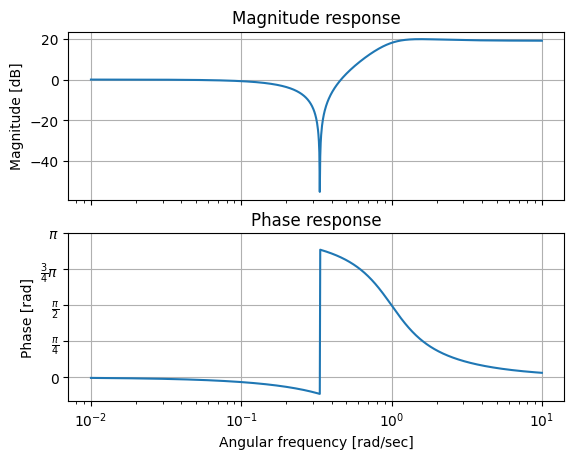

In [12]:
bodePlot(TransferFunction([9,0,1],[1,1,1])) # Polos en la misma ubicacion, ceros ahora en 1/3

Podemos observar que la ganancia es algo menor a $20dB$. Para esto:

$20\log(2a-c)=20dB$

$2a-c = 10$

$2a = 9$

$a = 4.5$

En este caso, al encarar el cálculo de los coeficientes desde la ganancia esperada (extrayendo la misma de un gráfico de baja resolución) se obtiene un resultado menos preciso, que implicará que el notch esté desplazado levemente. El cálculo manual anterior devuelve el resultado exacto.

### Comparación de circuitos

#### Cantidad de componentes
Operacionales: 2 en ambos circuitos

Resistores: 
* a: 5, de los cuales 3 tienen el mismo valor
* b: 7, de los cuales 3 tienen el mismo valor

Capacitores:
* a: 2 de igual valor
* b: 3 de distinto valor

#### Flexibilidad del circuito

Observando las transferencias, ambas ofrecen un denominador de segundo orden y numeradores de segundo orden de diferentes características.

El numerador del primer circuito no posee término lineal por lo que únicamente permite ubicar ceros en el eje $j\omega$. El término de segundo orden no posee un coeficiente que se pueda anular ajustando valores de componentes, por lo que no se podrán implementar transferencias con uno o ningún cero. En resumen, únicamente permite implementar transferencias pasaalto/notch.

Por el contrario, el numerador del segundo circuito posee coeficientes anulables para los términos de primer y segundo orden, por lo que permite implementar prácticamente cualquier tipo de trasnferencia (excepto por una que requiera polo/s en el origen). Es decir: pasabajos, pasabanda, pasaaltos, notch y pasatodo.

#### Síntesis de la etapa de primer orden

La etapa de primer orden debe implementar un cero en el origen y un polo en $s=1$:

$T_2 = \frac{s}{s+1}$

Esta transferencia se corresponde con la de un RC (C serie, R en derivación): $T_{RC} = \large\frac{s}{s+1/RC}$ en la que $RC = 1$.

Dado que la salida de la etapa de segundo orden se toma en la salida de un amplificador operacional, no es necesario utilizar un buffer a la entrada del circuito RC, aunque si se necesitará uno a la salida, antes de cargarlo (no necesario en este caso).

## Desnormalización

$R = R_n \Omega_Z$

$C = \frac{C_n}{\Omega_\omega \Omega_Z}$

$\Omega_Z = 10k\Omega\quad \Omega_\omega = 2\pi 300Hz$

In [13]:
def denorm_R(R_n,W_Z):
    return R_n * W_Z

def denorm_C(C_n,W_Z,W_w):
    return C_n/(W_Z*W_w)

### Etapa de primer orden

In [15]:
R_n = 1
C_n = 1

W_Z = 10e3
W_w = 2*np.pi*300

R_d = denorm_R(R_n,W_Z)
C_d = denorm_C(C_n,W_Z,W_w)

display(Math(r'\text{Valores desnormalizados}: \newline R=' + str(R_d) + r'\Omega' + \
             r'\newline C = ' + str(C_d) + r'F'))

<IPython.core.display.Math object>

### Etapa de segundo orden

Retomando la implementación sugerida:

In [16]:
display(Math(r'a=\frac{\omega_{0z}^2}{\omega_{0p}^2}=\frac{1}{9}'))
display(Math(r'G_1=' + sp.latex(G1_alt) + r'=\frac{8}{9}G_2'))
display(Math(r'q_p=' + sp.latex(q_p.subs(G1,G1_alt)) + r'=\frac{1}{\omega_0}=1'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$G = G_2 (8/9)^2 \Rightarrow G_2 = \frac{81}{64}G$

In [17]:
display(Math(r'w_{0p}=' + sp.latex(w0_p) + r'=\frac{1}{C}\sqrt{\frac{81}{64}G^2}=\frac{G}{C}\frac{9}{8}=1'))

<IPython.core.display.Math object>

$\Rightarrow \left\{R = \frac{1}{G} = 1;\quad R_1 = \frac{1}{G_1} = \frac{8}{9};\quad R_2 = \frac{64}{81};\quad C = \frac{9}{8}\right\}$

In [ ]:
R_n = 1
R1_n = 8/9
R2_n = 64/81
C_n = 9/8

W_Z = 10e3
W_w = 2*np.pi*300

R_d = denorm_R(R_n,W_Z)
R2_d = denorm_R(R2_n,W_Z)
R1_d = denorm_R(R1_n,W_Z)
C_d = denorm_C(C_n,W_Z,W_w)

display(Math(r'\text{Valores desnormalizados}: \newline R=' + str(R_d) + r'\Omega' + \
             r'\newline R_1 = ' + str(R1_d) + r'\Omega' + \
             r'\newline R_2 = ' + str(R2_d) + r'\Omega' + \
             r'\newline C = ' + str(C_d) + r'F'))

## Simulación circuital

<img src="./circ_full.png" width="100%" height="100%"/>
<img src="./sim_full.png" width="100%" height="100%"/>

En la simulación se puede observar que, si bien se diseñó el filtro como Butterworth, no presenta exactamente una magnitud de -3dB en la frecuencia de corte. Esto se debe a que los ceros de transmisión afectan también a la transferencia en la región lindera, por lo que las apreciaciones originales del tipo de transferencia pierden sentido.